## Problem Statement:
## Prepare a classification model using SVM for Salary Data

## 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 2. Load Train and Test Dataset

In [2]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [3]:
train_data.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Data Description:

* age -- age of a person
* workclass	-- A work class is a grouping of work 
* education	-- Education of an individuals	
* maritalstatus -- Marital status of an individulas	
* occupation	 -- occupation of an individuals
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment	
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week	
* native -- Native of an individual
* Salary -- salary of an individual

## 3. EDA

In [4]:
print(train_data.shape)
print(test_data.shape)

(30161, 14)
(15060, 14)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## Data Visualization

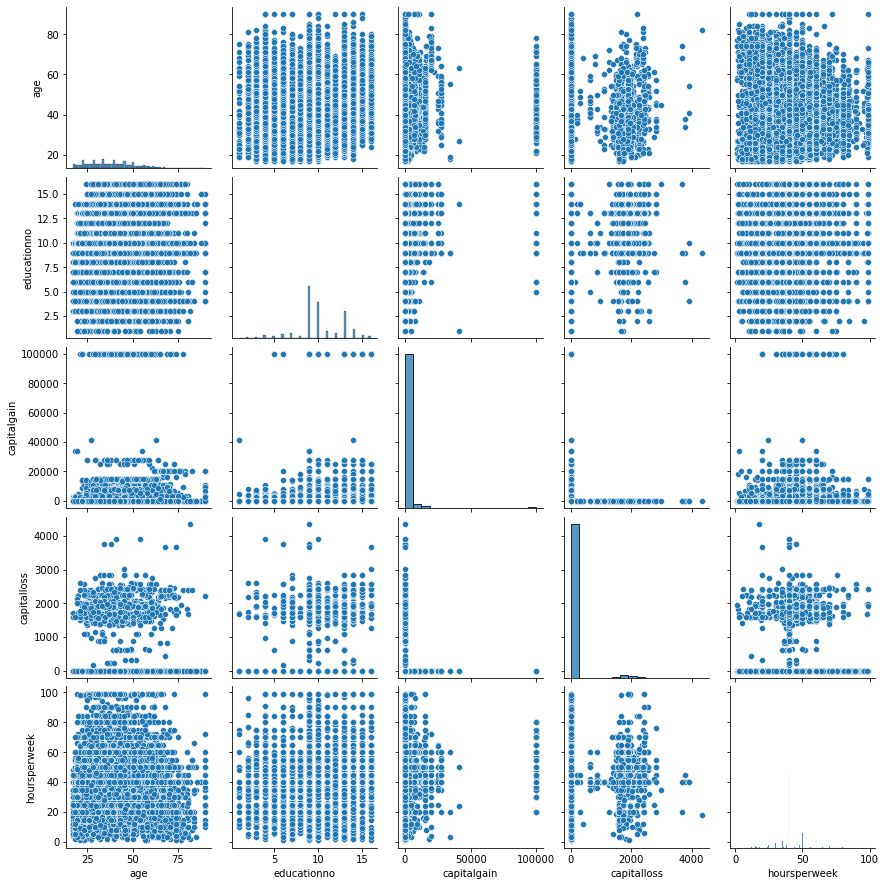

In [8]:
sns.pairplot(train_data)
plt.show()

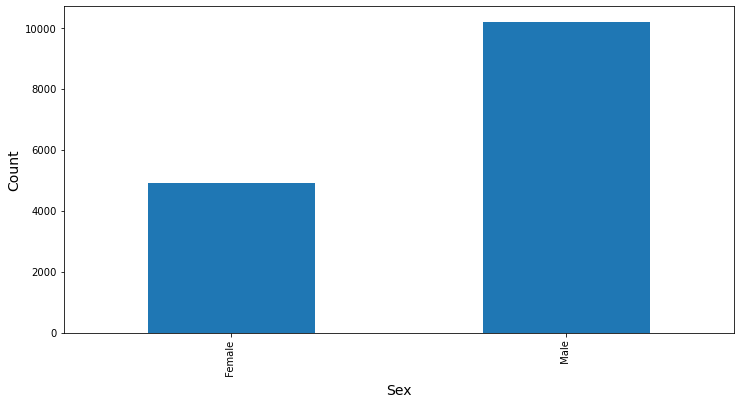

In [9]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['sex']).mean().plot(kind='bar')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

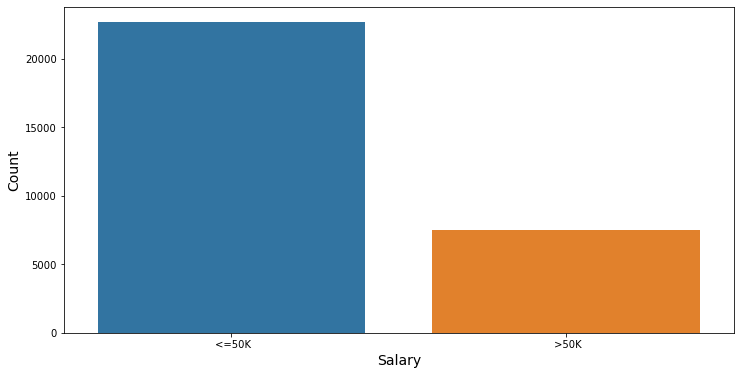

In [10]:
plt.rcParams["figure.figsize"] = (12,6)
sns.countplot(x='Salary', data= train_data)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Text(0, 0.5, 'Count')

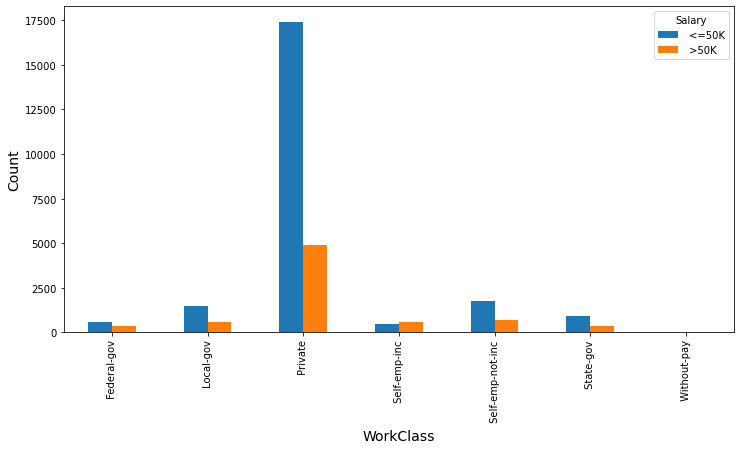

In [11]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data.workclass,train_data.Salary).plot(kind="bar")
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)

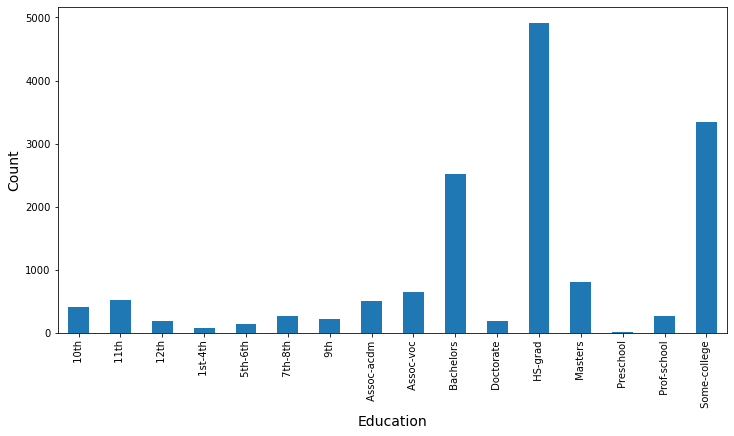

In [12]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['education']).mean().plot(kind='bar')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

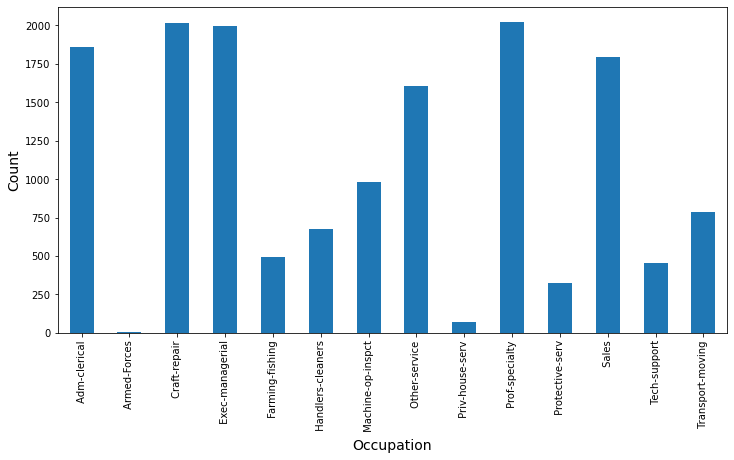

In [13]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['occupation']).mean().plot(kind='bar')
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

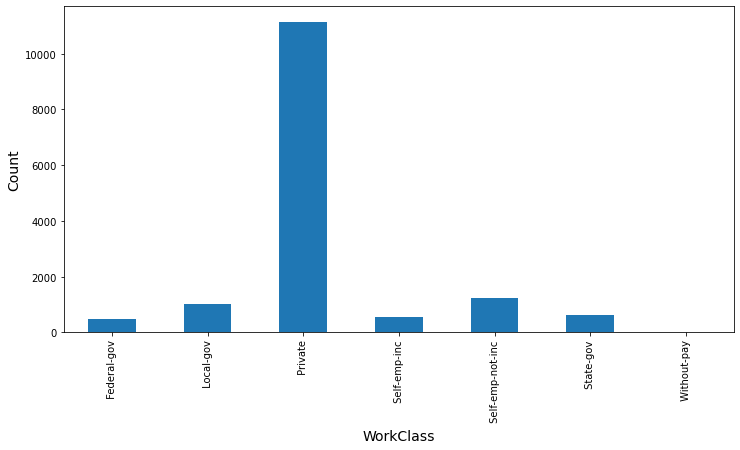

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data['Salary'],train_data['workclass']).mean().plot(kind='bar')
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

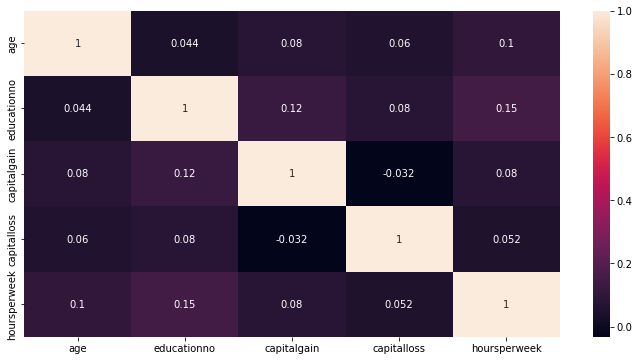

In [15]:
corr = train_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

###  Outliers Detection

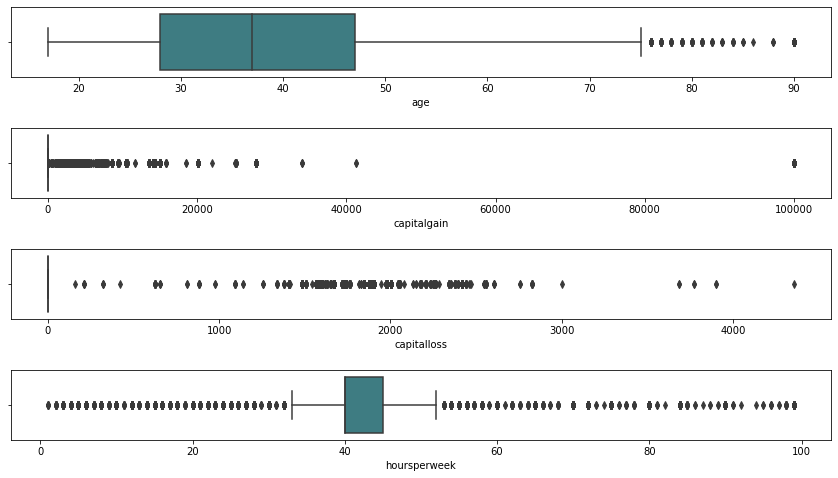

In [16]:
outlier1 = train_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

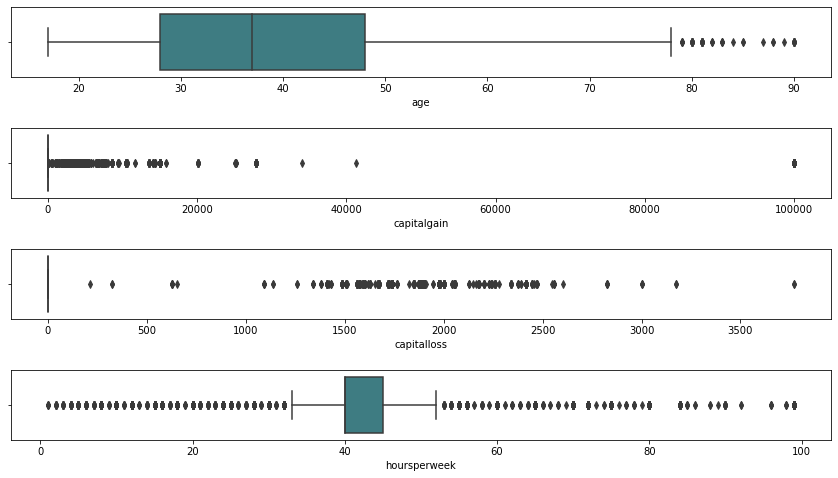

In [17]:
outlier2 = test_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## 4. Data Preprocessing

In [18]:
le=LabelEncoder()
train_data['workclass']=le.fit_transform(train_data['workclass'])
train_data['education']=le.fit_transform(train_data['education'])
train_data['maritalstatus']=le.fit_transform(train_data['maritalstatus'])
train_data['occupation']=le.fit_transform(train_data['occupation'])
train_data['relationship']=le.fit_transform(train_data['relationship'])
train_data['race']=le.fit_transform(train_data['race'])
train_data['sex']=le.fit_transform(train_data['sex'])
train_data['native']=le.fit_transform(train_data['native'])
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [19]:
train_data['Salary']=[0 if i.strip()=='<=50K' else 1 for i in train_data['Salary']]

In [20]:
test_data['workclass']=le.fit_transform(test_data['workclass'])
test_data['education']=le.fit_transform(test_data['education'])
test_data['maritalstatus']=le.fit_transform(test_data['maritalstatus'])
test_data['occupation']=le.fit_transform(test_data['occupation'])
test_data['relationship']=le.fit_transform(test_data['relationship'])
test_data['race']=le.fit_transform(test_data['race'])
test_data['sex']=le.fit_transform(test_data['sex'])
test_data['native']=le.fit_transform(test_data['native'])
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [21]:
test_data['Salary']=[0 if i.strip()=='<=50K' else 1 for i in test_data['Salary']]

## 5. Model Building

In [22]:
X_train = train_data.drop(['Salary'],axis=1)
y_train = train_data[['Salary']]

X_test = test_data.drop(['Salary'],axis=1)
y_test = test_data[['Salary']]

In [23]:
print('X_train Shape :', X_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape  :', X_test.shape)
print('y_test Shape  :', y_test.shape)

X_train Shape : (30161, 13)
y_train Shape : (30161, 1)
X_test Shape  : (15060, 13)
y_test Shape  : (15060, 1)


## 6. Model Training | Testing | Evaluation - SVM Model

In [24]:
%%time
svc = SVC()
svc.fit(X_train, y_train)

CPU times: total: 17.2 s
Wall time: 17.4 s


SVC()

In [25]:
%%time
y_pred = svc.predict(X_test)

CPU times: total: 15.1 s
Wall time: 15.3 s


In [26]:
print(confusion_matrix(y_test, y_pred))

[[10997   363]
 [ 2703   997]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [28]:
svc.score(X_train, y_train)

0.7960279831570571

In [29]:
svc.score(X_test, y_test)

0.7964143426294821

## Handling Imbalance Data

In [30]:
train_data['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [31]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [32]:
X_resampled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45301,65,2,12,14,2,10,0,4,1,0,0,48,37
45302,25,2,8,12,2,9,0,4,1,0,0,50,37
45303,36,2,13,14,2,9,0,4,1,0,0,40,37
45304,34,2,10,13,4,3,1,4,1,27828,0,60,25


In [33]:
y_resampled

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
45301,1
45302,1
45303,1
45304,1


In [34]:
y_resampled.value_counts()

Salary
0         22653
1         22653
dtype: int64

In [35]:
%%time
svc = SVC(C=2,gamma=0.01)
svc.fit(X_resampled,y_resampled)

CPU times: total: 1min 52s
Wall time: 1min 54s


SVC(C=2, gamma=0.01)

In [36]:
%%time
y_pred=svc.predict(X_test)

CPU times: total: 32.9 s
Wall time: 33.4 s


In [37]:
print(confusion_matrix(y_test,y_pred))

[[9269 2091]
 [ 655 3045]]


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     11360
           1       0.59      0.82      0.69      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.82      0.78     15060
weighted avg       0.85      0.82      0.83     15060



In [39]:
svc.score(X_resampled,y_resampled)

0.8714739769566945

In [40]:
svc.score(X_test,y_test)

0.8176626826029216

## Feature Selection

In [41]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 7927.146247
Feature 1: 4.061261
Feature 2: 264.815807
Feature 3: 2178.317438
Feature 4: 982.227659
Feature 5: 218.597378
Feature 6: 3435.382731
Feature 7: 29.339535
Feature 8: 459.219298
Feature 9: 74124662.376269
Feature 10: 1258785.769299
Feature 11: 5569.194066
Feature 12: 16.707320


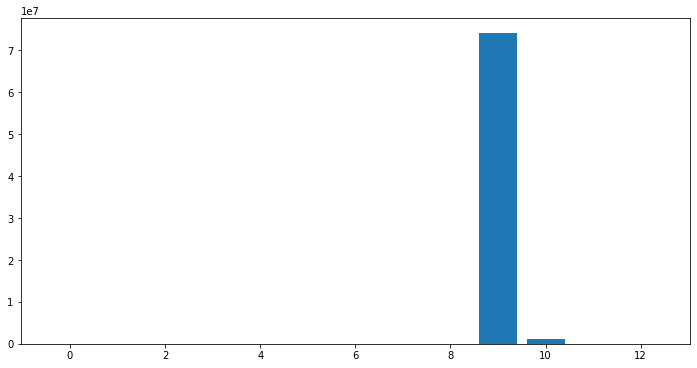

In [42]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Features 1,2,5,7,8,12 are not highly relevant

In [43]:
train_data_copy = train_data.copy()
train_data_copy.drop(train_data_copy.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
train_data_copy

,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,2,0,0,0,13,0
2,38,9,0,1,0,0,40,0
3,53,7,2,0,0,0,40,0
4,28,13,2,5,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,2,5,0,0,38,0
30157,40,9,2,0,0,0,40,1
30158,58,9,6,4,0,0,40,0
30159,22,9,4,3,0,0,20,0


In [44]:
X_train = train_data_copy.drop(['Salary'],axis=1)
y_train = train_data_copy[['Salary']]

In [45]:
test_data_copy = test_data.copy()
test_data_copy.drop(test_data_copy.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
test_data_copy

,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,4,3,0,0,40,0
1,38,9,2,0,0,0,50,0
2,28,12,2,0,0,0,40,1
3,44,10,2,0,7688,0,40,1
4,34,6,4,1,0,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,3,0,0,40,0
15056,39,13,0,1,0,0,36,0
15057,38,13,2,0,0,0,50,0
15058,44,13,0,3,5455,0,40,0


In [46]:
X_test = test_data_copy.drop(['Salary'],axis=1)
y_test = test_data_copy[['Salary']]

## Model Training with Highly Relevant Features
* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [47]:
%%time
svc=SVC(C=3.0, kernel='rbf', gamma=0.01, random_state=10)
svc.fit(X_train,y_train)

CPU times: total: 34.5 s
Wall time: 34.9 s


SVC(C=3.0, gamma=0.01, random_state=10)

In [48]:
%%time
y_pred=svc.predict(X_test)

CPU times: total: 19.1 s
Wall time: 19.3 s


In [49]:
print(confusion_matrix(y_test,y_pred))

[[10930   430]
 [ 1708  1992]]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11360
           1       0.82      0.54      0.65      3700

    accuracy                           0.86     15060
   macro avg       0.84      0.75      0.78     15060
weighted avg       0.85      0.86      0.85     15060



In [51]:
svc.score(X_train,y_train)

0.8616093630847783

In [52]:
svc.score(X_test,y_test)

0.8580345285524569

## SVM With GridSearch - take more time

# THE END !!